In [22]:
import pandas as pd
import yfinance as yf
import numpy as np

In [30]:
START = "2018-01-01"
END = "2023-02-01"
SYMBOL = ["TSLA", "KRW=X", "AAPL", "META", "GOOG", "^GSPC", "GLD"]

df = yf.download(SYMBOL, start=START, end=END, period='1d', interval='1d', ignore_tz=True)

[*********************100%***********************]  7 of 7 completed


In [54]:
data = df['Open']
data.pct_change().round(3).head()

,AAPL,GLD,GOOG,KRW=X,META,TSLA,^GSPC
Date,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,-0.001,NaN,NaN,NaN
2018-01-03,0.014,0.003,0.015,-0.003,0.024,0.029,0.005
2018-01-04,0.000,-0.001,0.022,0.003,0.017,-0.025,0.008
2018-01-05,0.005,0.000,0.006,-0.002,0.004,0.012,0.004


<AxesSubplot: xlabel='Date'>

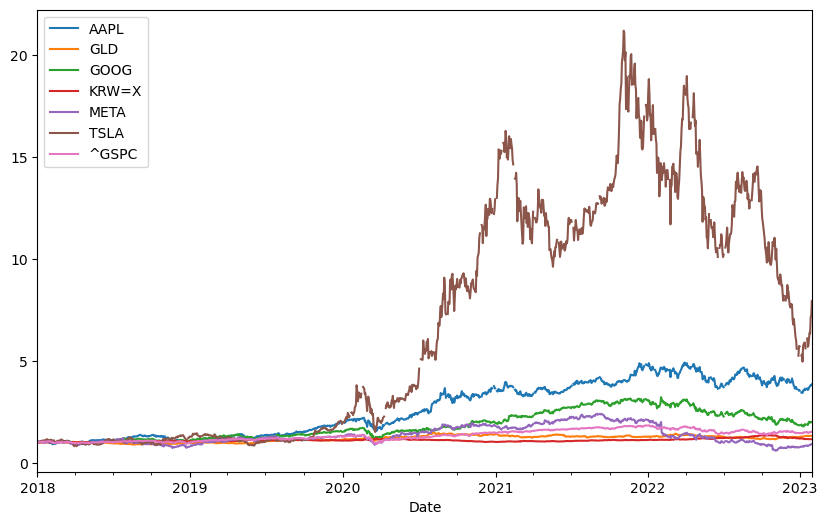

In [32]:
rets = np.log(data / data.shift(1))
rets.round(3).head()
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))

C:\Users\user\AppData\Local\Temp\ipykernel_13340\1154567559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_apple['SMA1'] = data_apple[sym].rolling(window=42).mean()


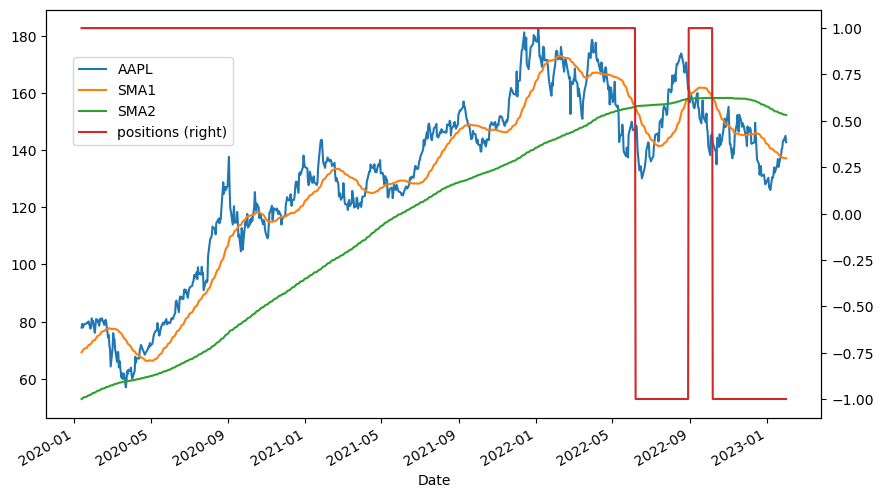

In [97]:
sym = "AAPL"
data_apple = data[[sym]] 
data_apple['SMA1'] = data_apple[sym].rolling(window=42).mean()
data_apple['SMA2'] = data_apple[sym].rolling(window=256).mean()

data_apple.dropna(inplace=True)
data_apple['positions'] = np.where(data_apple['SMA1'] > data_apple['SMA2'], 1, -1)

ax = data_apple.plot(figsize=(10, 6), secondary_y='positions')

ax.get_legend().set_bbox_to_anchor((0.25, 0.65))